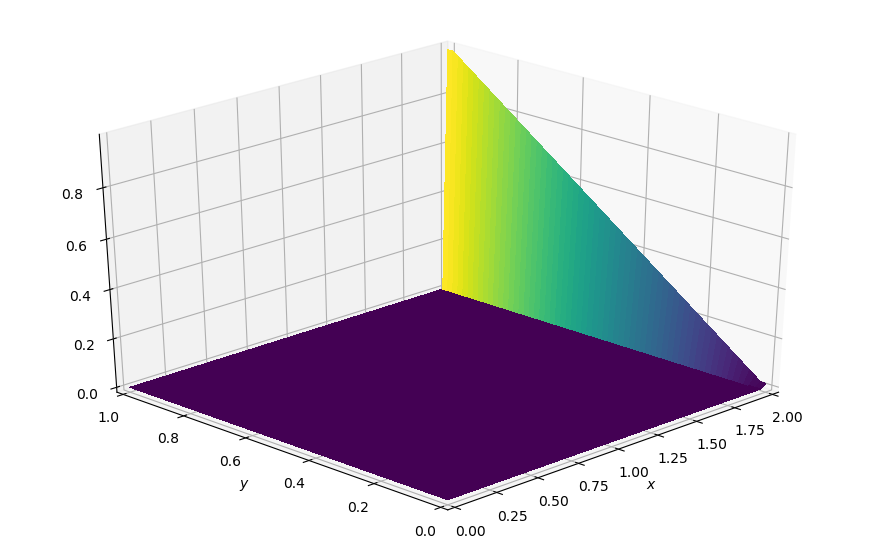

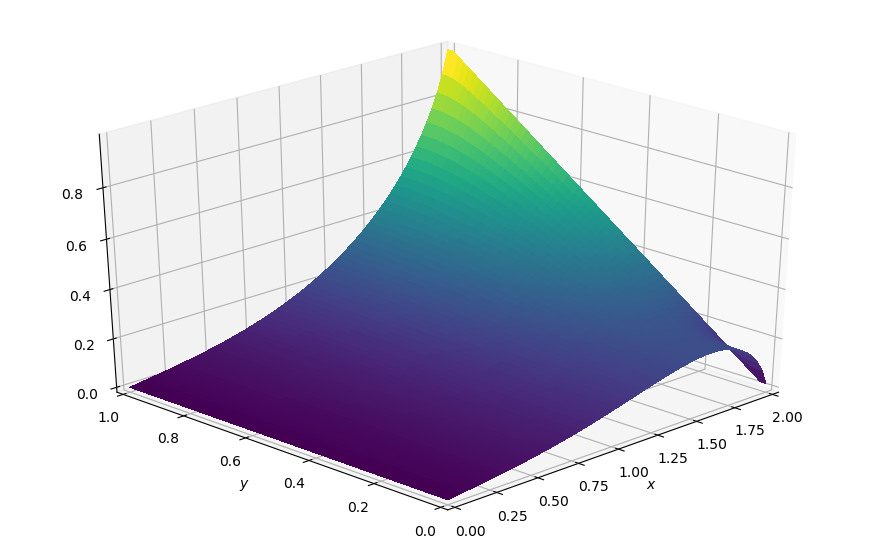

In [4]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
def laplace2d(p, y, dx, dy, l1normtarget):
    pn = numpy.empty_like(p)
    l1norm = 1
    while l1norm > l1normtarget:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) / (2 * (dx**2 + dy**2)))
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]   # dp/dy = 0 at y = 0
        p[-1,:] = p[-2,:] # dp/dy = 0 at y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:]))) / numpy.sum(numpy.abs(pn[:]))    
    return p
    
#variables
nx = 61
ny = 61
dx = 2 / (nx - 1)
dy = 1 / (ny - 1)

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

#initial conditions
p = numpy.zeros((ny, nx))

#boundary conditions
p[:,0] = 0
p[:,-1] = y
p[0,:] = p[1,:]   # dp/dy = 0 at y = 0
p[-1,:] = p[-2,:] # dp/dy = 0 at y = 1

plot2D(x, y, p)

p = laplace2d(p, y, dx, dy, 1e-4)

plot2D(x, y, p)
